## Leverage Effect:

# $ \left ( Market Return \right )\propto \left ( Volatility \right )$

- we'll test this using Regression Analysis

In [70]:
import pandas as pd
from urllib import urlretrieve
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
es_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/hbrbcpe.txt'
vs_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vstoxx.txt'
plt.rcParams["figure.figsize"] = [30,15]

#### Importing Data

In [47]:
urlretrieve(es_url, 'es.txt')
urlretrieve(vs_url, 'vs.txt')

('vs.txt', <httplib.HTTPMessage instance at 0x000000001112CA08>)

In [48]:
lines = open('es.txt','r').readlines()
lines = [line.replace(' ','') for line in lines]

In [49]:
new_file = open('es50.txt','w')
new_file.writelines('date' + lines[3][:-1] + ';DEL' + lines[3][-1])
new_file.writelines(lines[4:])
new_file.close()

In [50]:
new_lines = open('es50.txt','r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [51]:
df_es = pd.read_csv('es50.txt',index_col=0, parse_dates=True, sep=';', dayfirst=True)
del df_es['DEL']

In [52]:
df_es.head()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
date,,,,,,,,
1986-12-31,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56
1987-01-01,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56
1987-01-02,770.89,891.78,82.57,97.80,97.43,69.37,647.62,65.81
1987-01-05,771.89,898.33,82.82,98.60,98.19,69.16,649.94,65.82
1987-01-06,775.92,902.32,83.28,99.19,98.83,69.50,652.49,66.06


In [53]:
df_vs=pd.read_csv('vs.txt',index_col=0, header=2, parse_dates=True, sep=',',dayfirst=True)

In [54]:
#dropping rows where the date isn't in df_vs
df_es = df_es.loc[df_vs.index]

In [55]:
df_es.head()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
Date,,,,,,,,
1999-01-04,3474.14,3543.10,287.81,313.92,326.93,261.55,3968.54,300.47
1999-01-05,3535.30,3604.67,291.40,316.97,331.00,265.68,4030.95,305.37
1999-01-06,3615.93,3685.36,298.11,323.16,336.96,272.98,4068.85,308.34
1999-01-07,3566.02,3627.87,294.55,318.27,332.70,270.80,4100.77,311.57
1999-01-08,3569.24,3616.57,296.03,318.02,333.38,274.12,4126.04,313.56


In [56]:
df_data = pd.DataFrame()
df_data['EUROSTOXX'] = df_es['SX5E'].copy()
df_data['VSTOXX'] = df_vs['V2TX'].copy()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000278B1908>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000002807DAC8>], dtype=object)

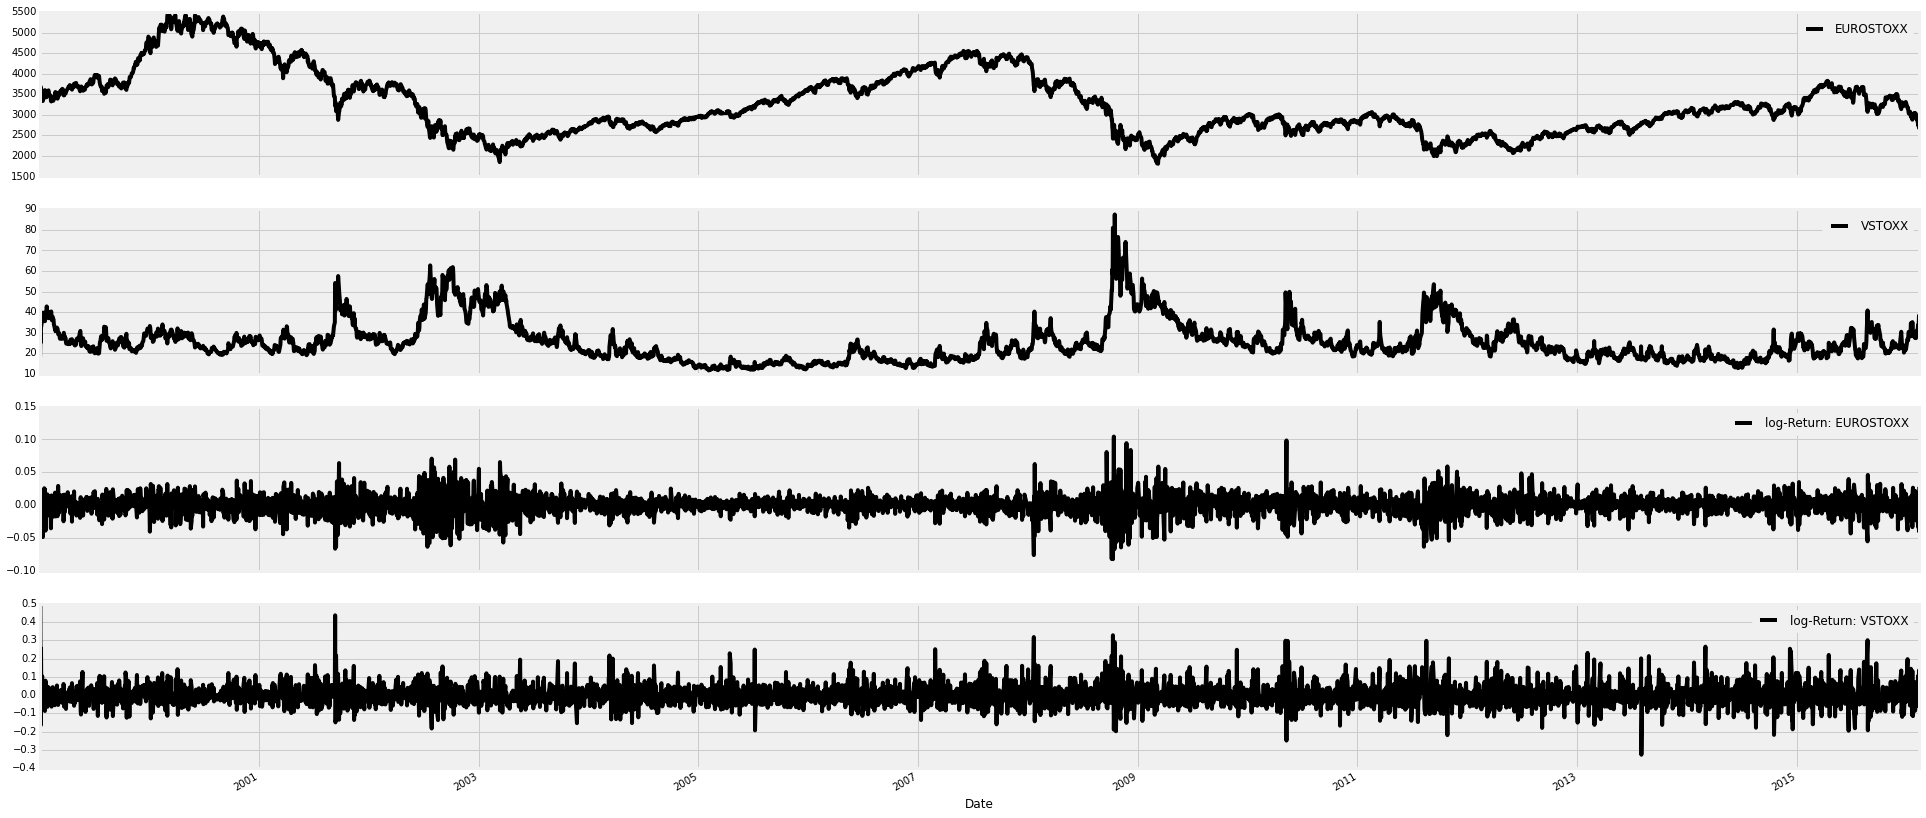

In [78]:
df_data.plot(subplots=True, figsize=(30, 15))

In [58]:
df_data['log-Return: EUROSTOXX'] = np.log(df_data['EUROSTOXX']/df_data['EUROSTOXX'].shift(1))
df_data['log-Return: VSTOXX'] = np.log(df_data['VSTOXX']/df_data['VSTOXX'].shift(1))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000279A8940>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000277AFCF8>], dtype=object)

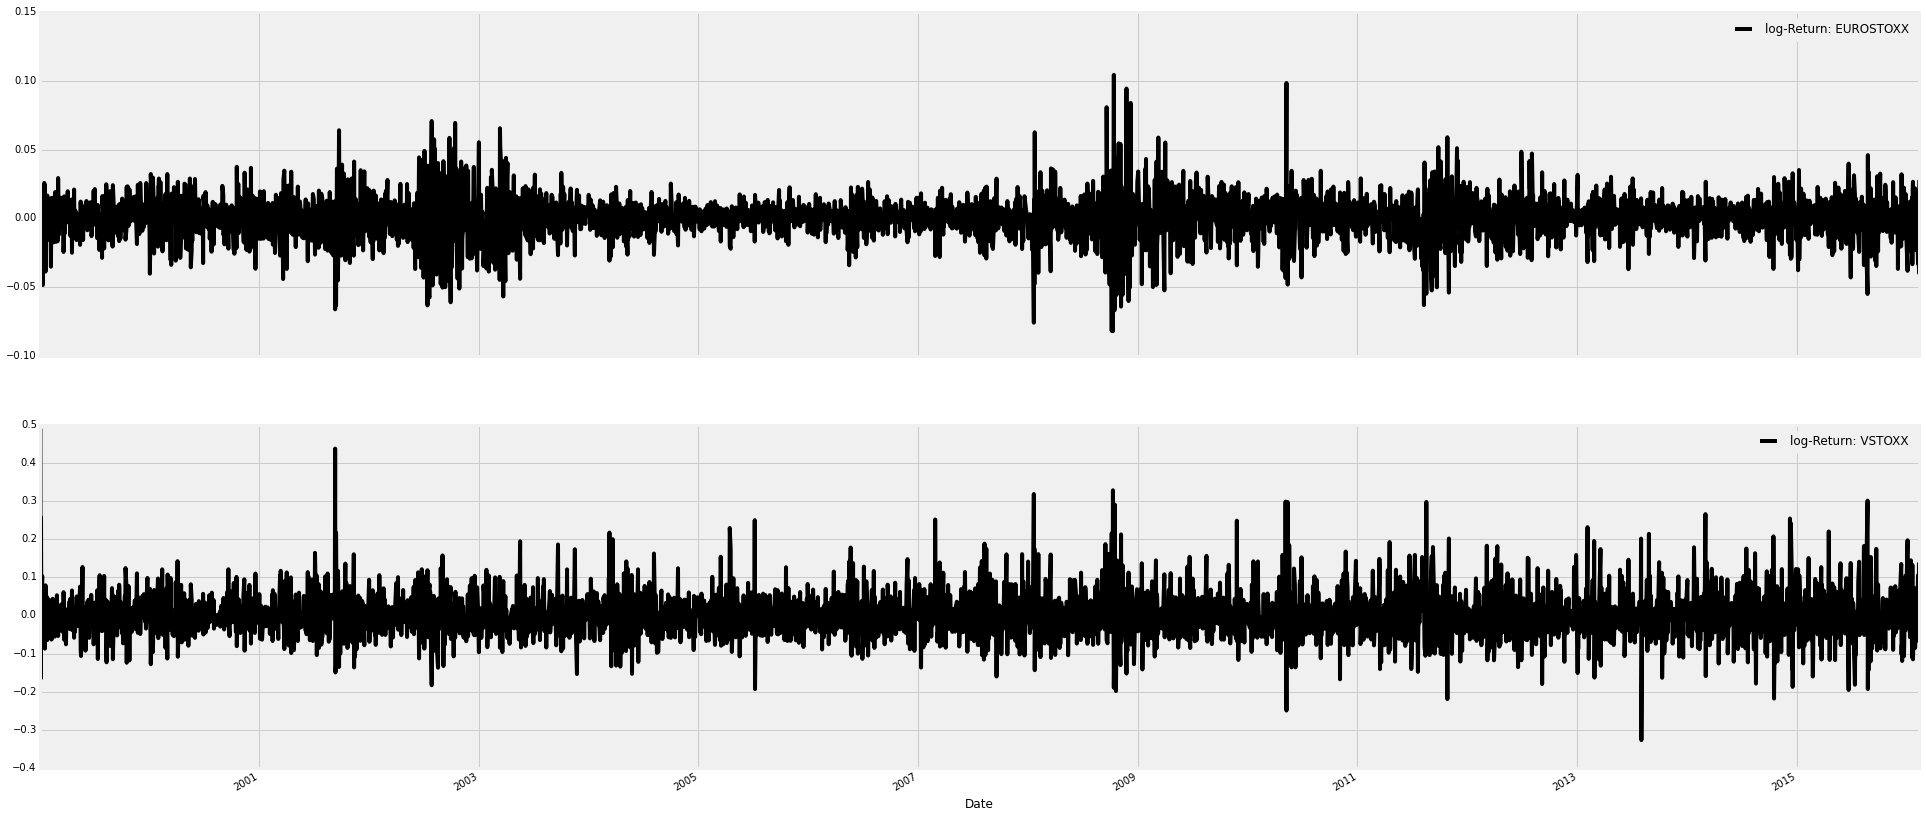

In [77]:
df_data[['log-Return: EUROSTOXX','log-Return: VSTOXX']].plot(subplots=True)

# Running the regression

In [62]:
model = pd.ols(x=df_data['log-Return: EUROSTOXX'],y=df_data['log-Return: VSTOXX'])
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         4354
Number of Degrees of Freedom:   2

R-squared:         0.5438
Adj R-squared:     0.5437

Rmse:              0.0395

F-stat (1, 4352):  5187.9643, p-value:     0.0000

Degrees of Freedom: model 1, resid 4352

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -2.8471     0.0395     -72.03     0.0000    -2.9246    -2.7696
     intercept    -0.0000     0.0006      -0.04     0.9710    -0.0012     0.0012
---------------------------------End of Summary---------------------------------

In [63]:
model.beta

x           -2.847079
intercept   -0.000022
dtype: float64

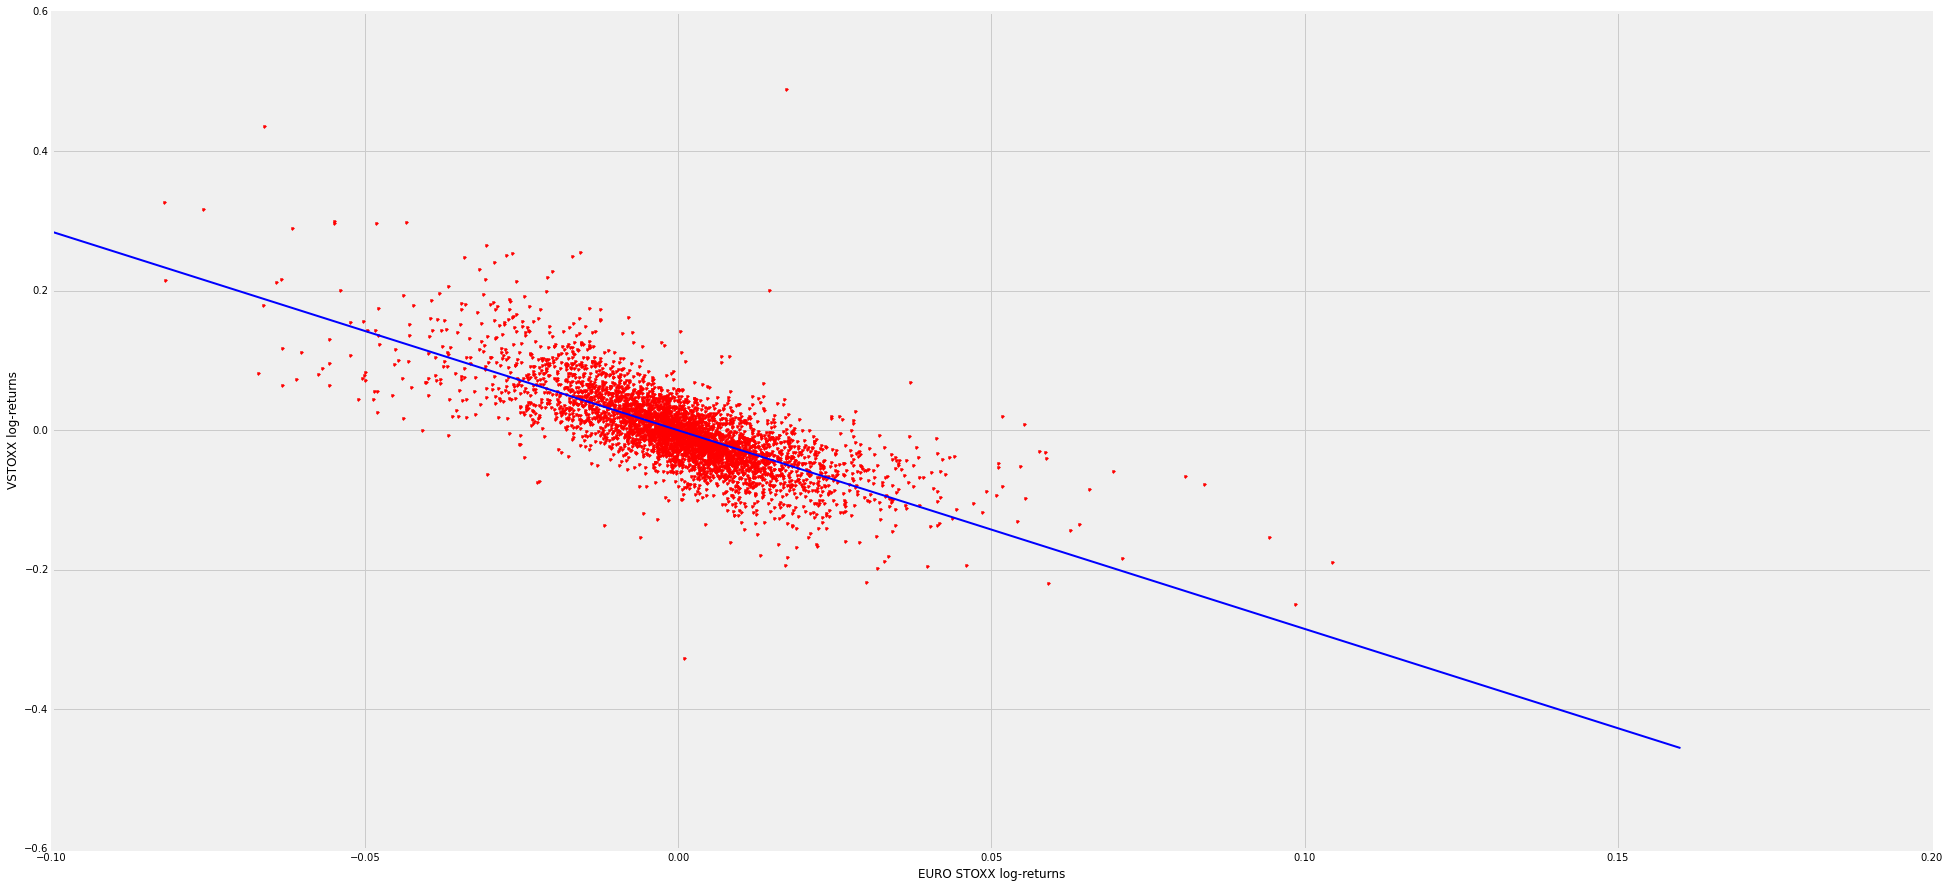

In [76]:
plt.plot(df_data['log-Return: EUROSTOXX'],df_data['log-Return: VSTOXX'], 'r.')
ax=plt.axis()
x = np.linspace(ax[0],ax[1]+0.01)
plt.plot(x, model.beta[1]+model.beta[0]*x, 'b', lw=2)
plt.xlabel('EURO STOXX log-returns')
plt.ylabel('VSTOXX log-returns')
plt.show()

In [72]:
df_data[['log-Return: EUROSTOXX','log-Return: VSTOXX']].corr()

,log-Return: EUROSTOXX,log-Return: VSTOXX
log-Return: EUROSTOXX,1.000000,-0.737437
log-Return: VSTOXX,-0.737437,1.000000


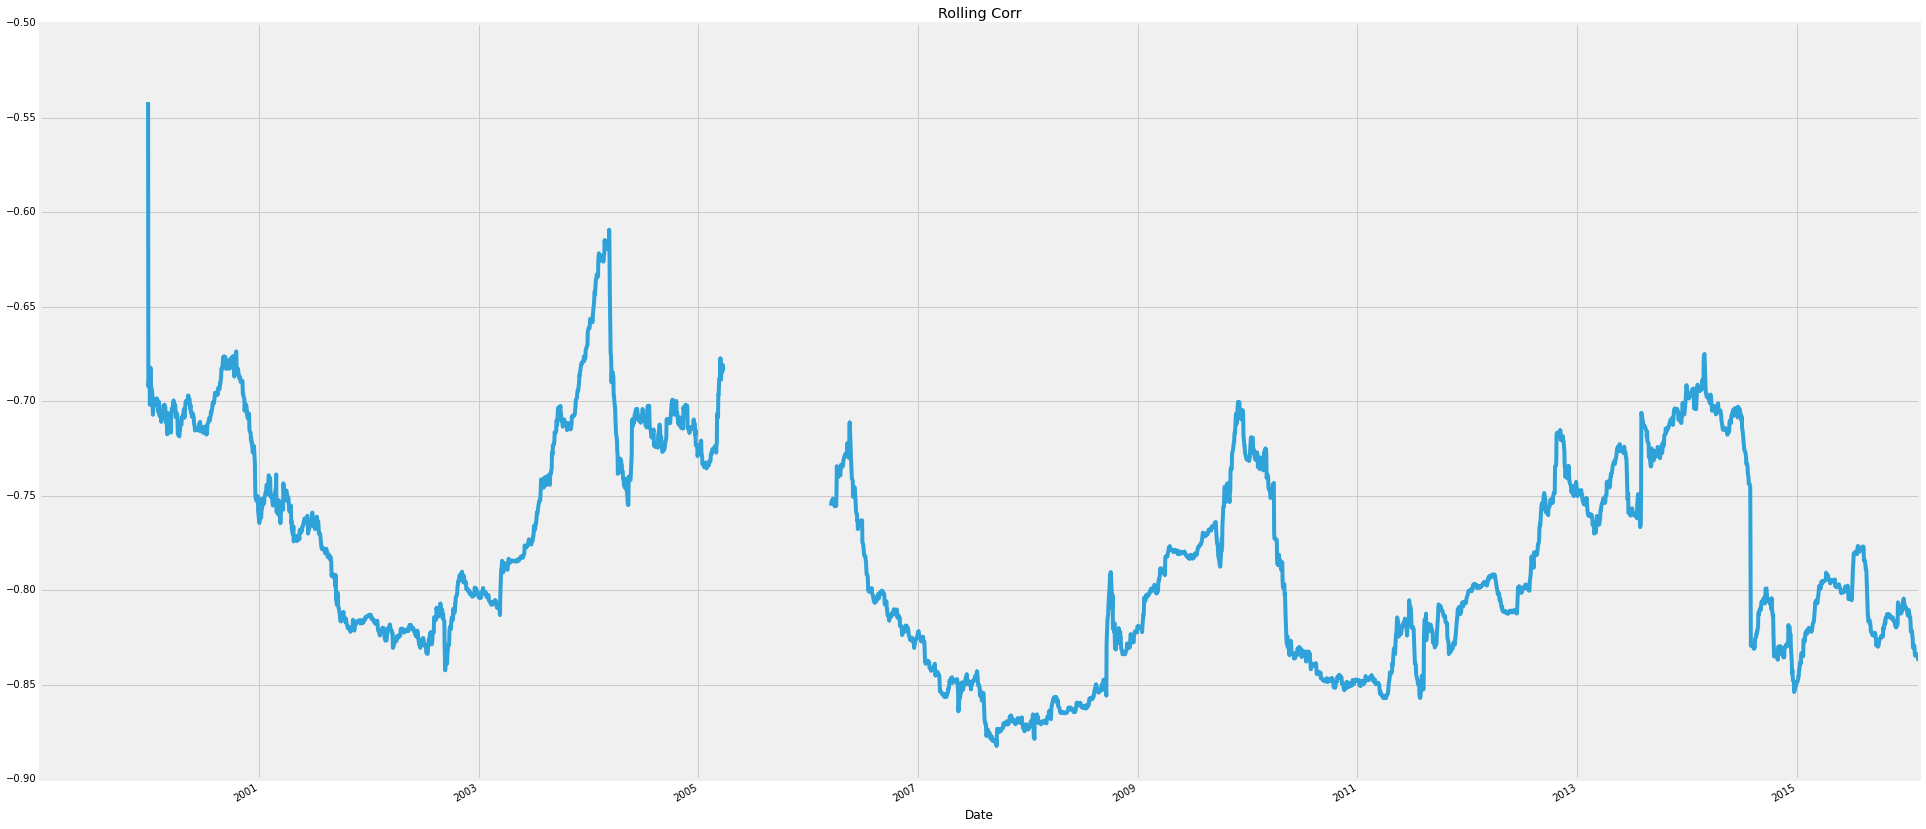

In [74]:
pd.rolling_corr(df_data['log-Return: EUROSTOXX'],df_data['log-Return: VSTOXX'], window=252).plot(title='Rolling Corr')